In [ ]:
# 정규화
# 텍스트기반 데이터 처리
# 시각화

# 프로젝트 시작

In [1]:
# sub() : 문자열 속에서 패턴과 일치하는 문자열을 찾아서 다른 문자열로 교체...
# [python의 replace와 유사하지만, sub()은 보다 광범위한 패턴의 문자열을 찾을 수 있다.]
import re

# 비인식 처리 - 개인정보 등
reg = re.compile(r'Agent \w+')
reg.sub('Censored', 'Agent Alice gave the secret documents to Agent Bob.')

# 그룹을 만드는 방식 (\w) - \1*** 처리방법 
# (\w{2}) 2개의 문자열 구성
reg = re.compile(r'Agent (\w{2})\w+')
reg.sub(r'Censored \1***', 'Agent Alice gave the secret documents to Agent Bob.')

# 전화번호를 추출
text = '문의사항 02-3545-7381으로 연락해주세요. 집 전화번호는 031-7840-8541입니다.'
reg = re.compile('\d{2,3}-\d{4}-\d{4}')
reg.findall(text)

# 숫자만 추출
text = '문자열 10 중간에 234 숫자가 8개 있습니다.'
reg = re.compile('\d+') # re.compile('[0-9]+')
reg.findall(text)

# 이메일  추출
text = '저의 이메일은 pine@hanmail.net이고, 담당자 이메일은 fio@gmail.com 입니다'
reg = re.compile('[a-zA-Z0-9]+@[a-zA-Z0-9]+.[a-z]+')
reg.findall(text)

# 금액만 추출
text = '총 금액은 122330.6원 입니다. 세금은 5214.233원입니다...'
reg = re.compile('\d+.?\d*원')
reg.findall(text)

# 날짜를 추출
text = '계약날짜는 2015년 2월 15일, 계약 종료일은 2017년 06월 22일입니다.'
reg = re.compile('\d+년 \d+월 \d+일')
reg.findall(text)

# url을 비인식
text = ''' 저의 홈페이지 주소는 http://www.homapage.com 입니다. 당신의 홈페이지 주소는 http://www.yourhomapge.com입니다'''
reg = re.compile(r'http[s]?://w{3}.[a-zA-Z0-9_-]+.[a-z]+')
#reg.findall(text)
reg.sub('****',text)

# 이메일 비인식
text = '저의 이메일은 pine@hanmail.net이고, 담당자 이메일은 fio@gamil.com입니다'
reg = re.compile('[a-zA-Z0-9]+(@[a-zA-Z0-9]+.[a-z]+)')
reg.sub(r'***\1', text)

re.findall(r"[0-9]+ [0-9]+", '10 925')
# () 묶어서 그룹행
m = re.match(r"([0-9]+) ([0-9]+)", '10 925')
m.group()
m.group(1)
m.group(2)

# \d - 숫자
# \w - 문자, 숫자, 밑줄 문자
# \s = 빈칸, 탭, 줄바꿈

# \D = 숫자를 제외한 모든 문자
# \W = 문자 ,숫자, 밑줄 문자('_')를 제외한 모든 문자
# \S - 빈칸, 탭, 줄바꿈을 제외한 모든 문자

# 문자열에서 숫자만을 제외하고 싶다.
text = '서울 부동산 가격이 올해 평균 30% 증가했습니다.'
reg = re.compile('\D+')
reg.findall(text)

# 문자열에서 숫자만을 제외하고 싶다.
# sub메소드 버전
text = '서울 부동산 가격이 올해 평균 30% 증가했습니다.'
reg = re.compile('\d+')
reg.sub('',text)

# 한글만 찾고싶다
text = '서울 부동산 가격이 올해 평균 30% 증가했습니다.'
reg = re.compile('[가-힣]+')
reg.findall(text)

# 스페이스 포함되게 힣 뒤에 스페이스
text = '서울 부동산 가격이 올해 평균 30% 상승했습니다'
reg = re.compile('[가-힣 ]+')
reg.findall(text)

 # 서브 메소드 버전
text = '서울 부동산 apt가격이 올해 평균 30% 상승했습니다'
reg = re.compile('[^가-힣 ]+')
reg.sub('', text)

re.sub('apple|orange', 'fruits', 'apple box arange tree')
def temp(m):
    n = int(m.group())
    return str(n*10)

re.sub('[0-9]+', temp, 'apple 34 box2 orange 5 tree')
text = 'hello 1234'
re.sub('([a-z]+) ([0-9]+)', r'\2 \1', text)

'저의 이메일은 ***@hanmail.net이고, 담당자 이메일은 ***@gamil.com입니다'

In [ ]:
#!pip install wordcloud
#!pip install pandas-profiling

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('eda_data_files\전국도시공원표준데이터.csv', encoding='euckr')
df.head(3)

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

# 전국의 공원데이터에 설치된 시설의 종류, 종류별 설치 댓수를 파악...
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


<Axes: >

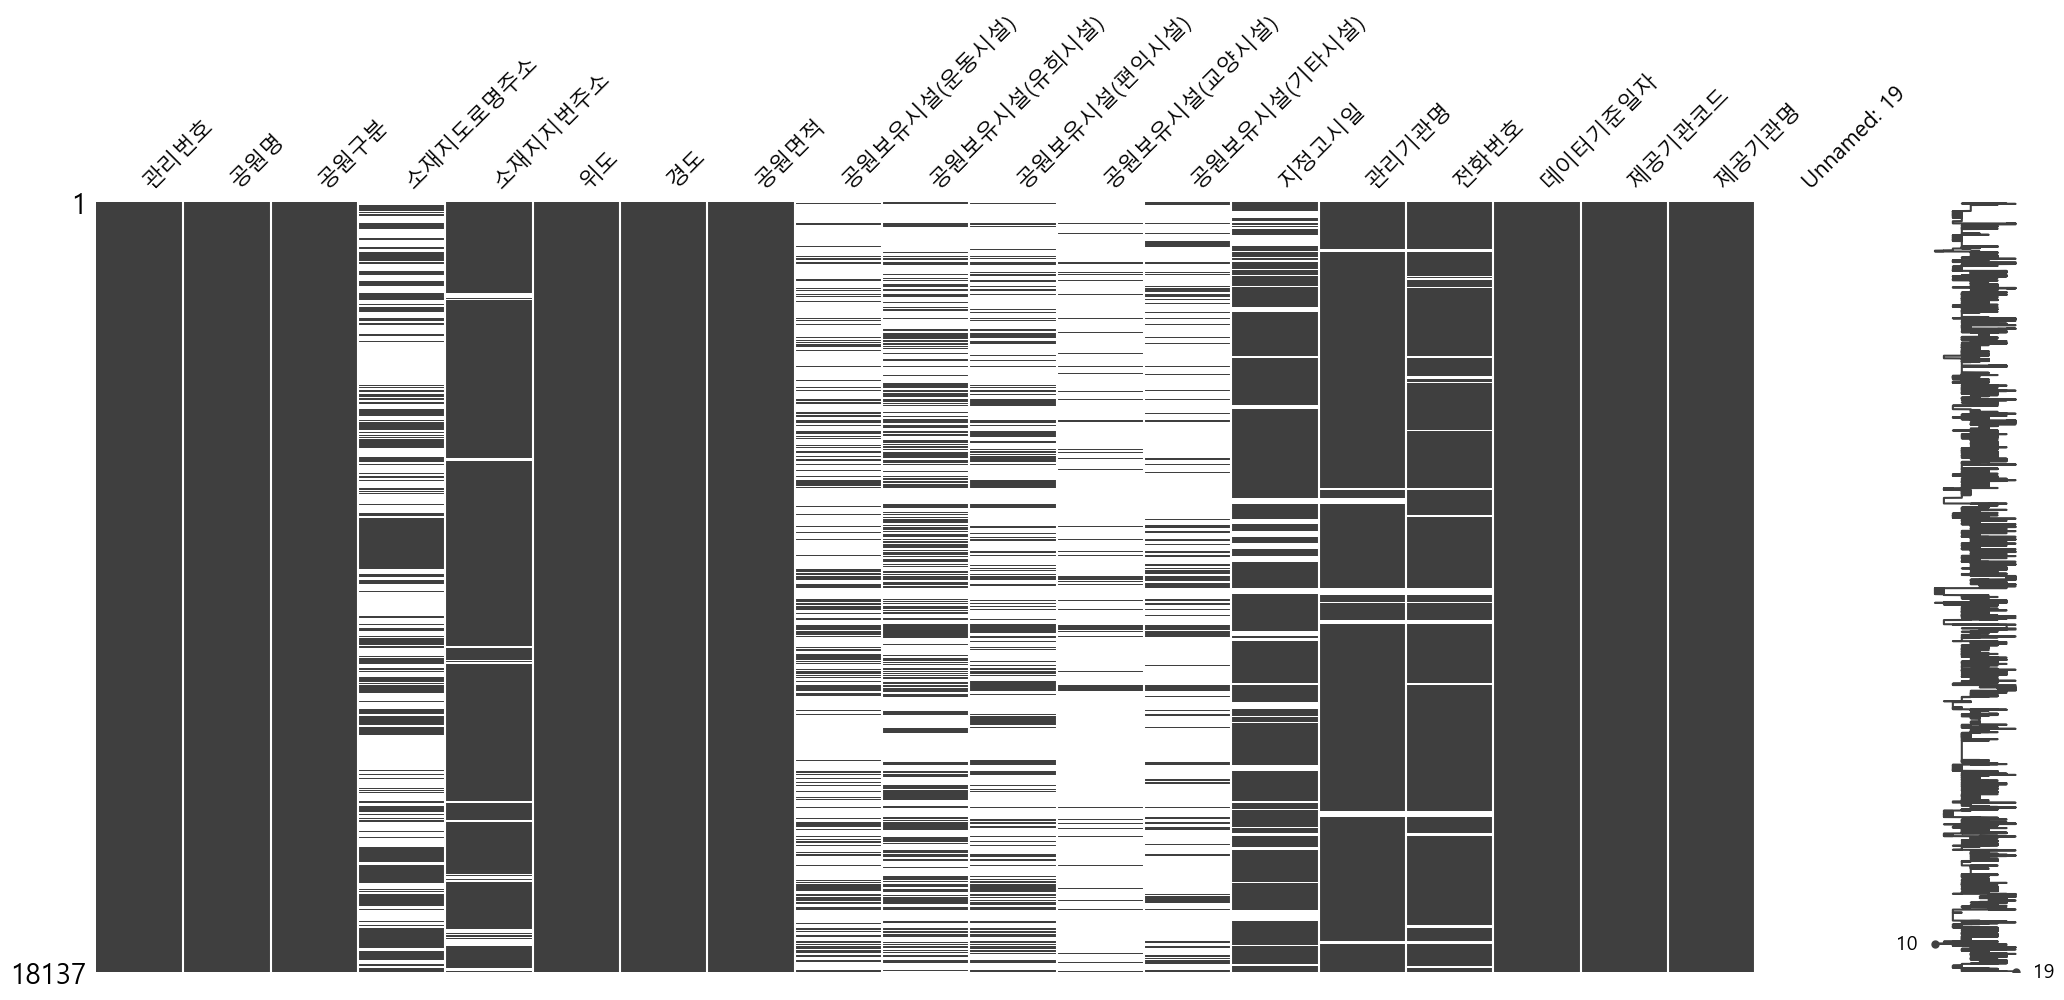

In [7]:
import missingno
missingno.matrix(df)

In [18]:
df[['소재지도로명주소','소재지지번주소']].isnull().sum()
df[['소재지도로명주소','소재지지번주소']].isnull().sum(axis=1).max() # 둘 중 하나는 값이 있다.

# 도로명 주소의 nan값을 지번주소로 채우기...
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
df['소재지도로명주소']

df['소재지도로명주소'].apply(lambda x:x.split()[0])
df['시도'] = df['소재지도로명주소'].str.split(expand=True)[0]

<Axes: xlabel='시도', ylabel='위도'>

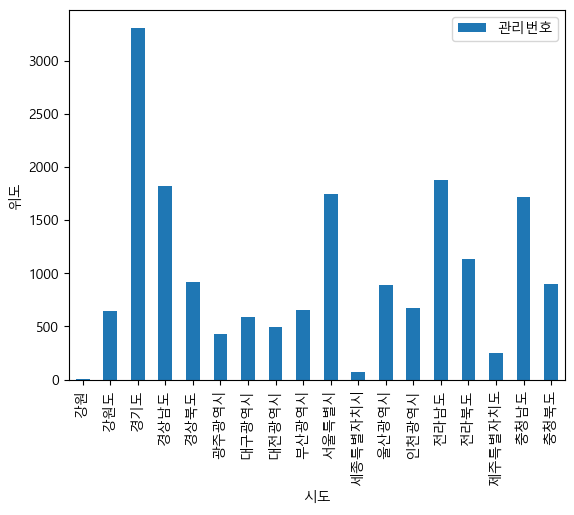

In [22]:
# 시도별 공원의 수를 파악...
df.groupby('시도').count()['관리번호']
df.groupby('시도').count()['관리번호'].plot(kind='bar')




Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19', '시도'],
      dtype='object')

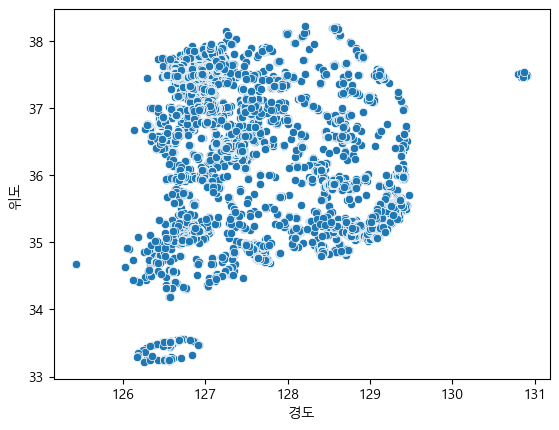

In [24]:
# out liner 제거
df1 = df[(df['경도'] < 132) & (df['위도'] > 32)]
sns.scatterplot(data=df1, x='경도', y='위도')

In [32]:
import datetime as dt

# 공원의 설립 시기...
df['지정고시일'] = pd.to_datetime(df['지정고시일'])

df['year'] = df['지정고시일'].dt.year
df['month'] = df['지정고시일'].dt.month

In [33]:
df[['year','month']].isnull().sum()

year     2912
month    2912
dtype: int64

In [34]:
df[['year', 'month']].notnull()

,year,month
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
18132,True,True
18133,True,True
18134,True,True
18135,True,True


<Axes: xlabel='year'>

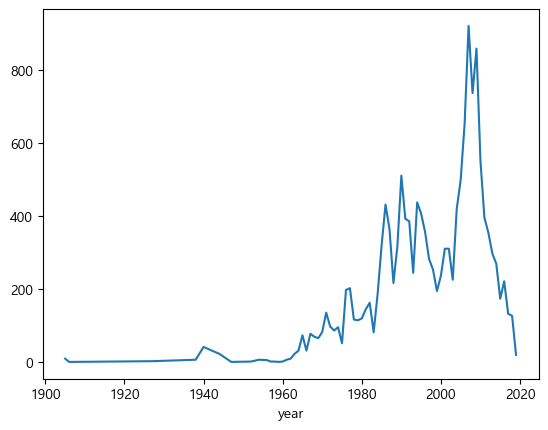

In [37]:
# nan값이 아닌 날짜 데이터를 출력...
df.loc[df['year'].notnull()]['year']
df.loc[df['year'].notnull(), 'year']
df.loc[df['year'].notnull(), 'year'].value_counts().sort_index()
df.loc[df['year'].notnull(), 'year'].value_counts().sort_index().plot()

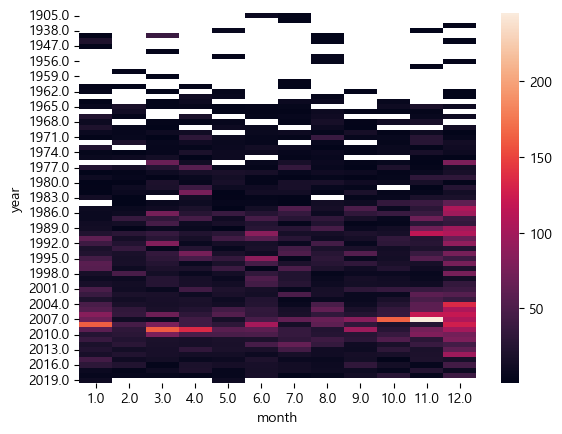

In [39]:
# 공원고시 년도, 월별로 파악..

df.groupby(['year', 'month']).count().관리번호  # multi groupby => 세분화된 group => mulit index, heirachical index
df.groupby(['year', 'month']).count().관리번호.unstack()
ym_df = sns.heatmap(df.groupby(['year', 'month']).count().관리번호.unstack())

In [40]:
# 색감으로 
df.groupby(['year', 'month']).count().관리번호.unstack().style.background_gradient()

month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
year,,,,,,,,,,,,
1905.000000,nan,nan,nan,nan,nan,8.000000,2.000000,nan,nan,nan,nan,nan
1906.000000,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan
1927.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.000000
1938.000000,nan,nan,nan,nan,6.000000,nan,nan,nan,nan,nan,1.000000,nan
1940.000000,2.000000,nan,39.000000,nan,nan,nan,nan,1.000000,nan,nan,nan,nan
1944.000000,21.000000,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,1.000000
1947.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1952.000000,nan,nan,2.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
1954.000000,nan,nan,nan,nan,2.000000,nan,nan,5.000000,nan,nan,nan,nan


<Axes: >

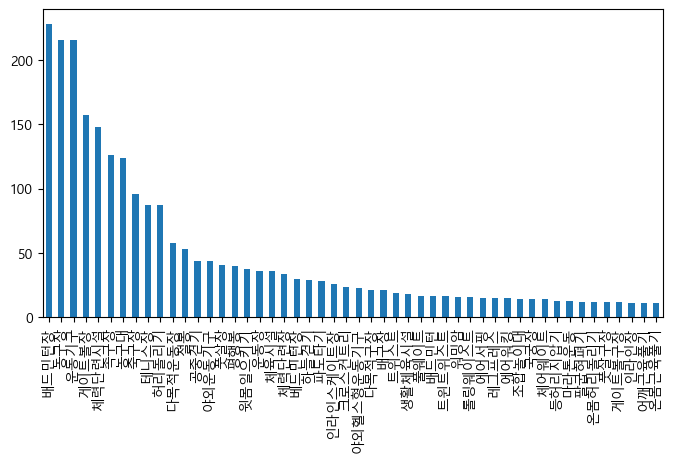

In [88]:
# 공원에 설치된 시설

import re
pd.options.display.max_columns = 100

df.columns

df['공원보유시설(운동시설)'].unique()
df['공원보유시설(운동시설)'].value_counts()[100:]

gym = str(df['공원보유시설(운동시설)'].unique().tolist())
gym[:100]

gym = gym.replace('+', ',').replace("'", ',').replace('/', ',').replace('(',',').replace(')',',')
gym[:1000]

gym = re.sub('\d', '', gym)
gym[:1000]

gym = re.sub('[\[\]\d\-nan\.]', '', gym)
gym[:1000]

gym = re.sub(',+', ',', gym)
gym[:1000]

gym = re.sub(',{2,}', ',', gym)
gym[:1000]

gym = re.sub(', ,', ',', gym)
gym[:1000]

gym = re.sub('(, ,)+', ',', gym)
gym[:1000]

gym = re.sub(' ', ',', gym)
gym[:1000]

gym = re.sub(',+', ',', gym)
gym[:1000]

gym_list = gym.split(',')
gym_list

# 불용어 : 문자열에서 의미를 가지지 않는 문자열...
# 불용어 사전... 
# 것, 그, 개, ㅋㅋ, ^^,


stopwords = ['개소', '개', '운동시설', '등', '외종']
gym_list = [gym for gym in gym_list if gym not in stopwords]
gym_list = [gym for gym in gym_list if len(gym) > 1]

gym_series = pd.Series(gym_list)
gym_series.value_counts()
gym_series.value_counts()[:50].plot(kind='bar', figsize=(8,4))

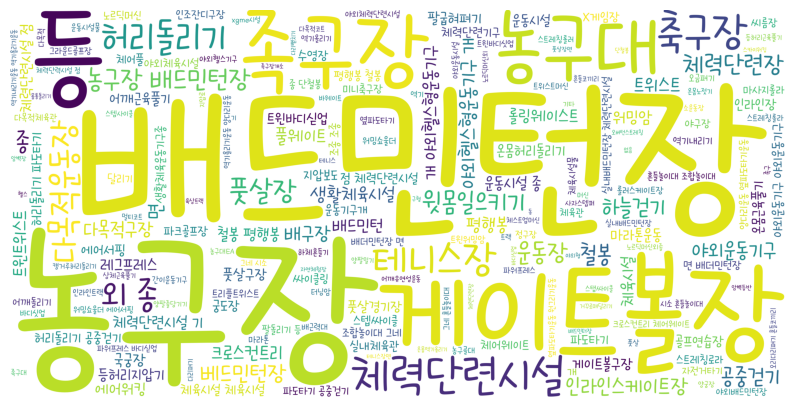

In [93]:

# 워드 표현해서 나타내기
from wordcloud import WordCloud

word_draw = WordCloud(
    font_path= r'C:\Users\GJ\AppData\Local\Microsoft\Windows\Fonts\KNPSKkomi.otf',
    width = 4000,
    height = 2000,
    stopwords = ['운동기구','개소','외종'],
    background_color = 'white',
    )


word_draw.generate(gym)
word_draw

plt.figure(figsize=(10,10))
plt.imshow(word_draw)
plt.axis('off')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

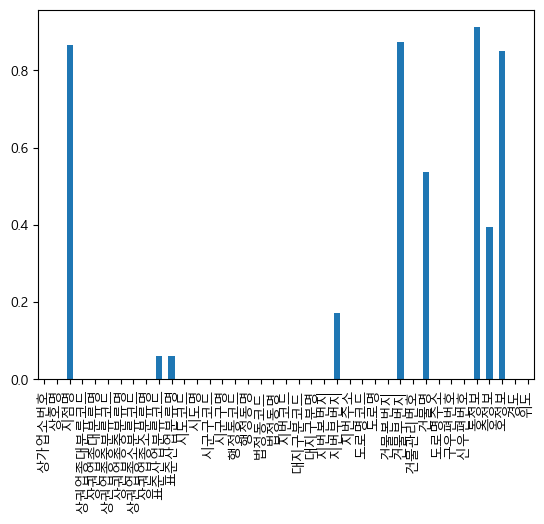

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\eda_data_files\상가업소정보_201912_01.csv', sep='|')
df.head(3)

df.info()

df.isnull().sum()/len(df)
(df.isnull().sum()/len(df)).plot(kind='bar')
(df.isnull().sum()/len(df)).sort_values(ascending=False).head(7)
df.columns



In [119]:

df1 = df[['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명',
       '시도명', '시군구명', '행정동명', '법정동명',
       '도로명주소', '경도', '위도']].copy()

df1.head()
df1.isnull().sum()
df1.dropna(axis=0, inplace=True)
df1.head(3)

# 베스킨라빈스, 던킨도너츠의 서울시 구별 매장수를 비교...

df2 = df1[df1.시도명 == '서울특별시']
df2.head(3)

# 베스킨 라벤스 관련내용 전부 작성
df2[df2.상호명 == '배스킨라빈스']
df2[df2.상호명 == '베스킨라빈스']
df2[df2.상호명 == 'baskinrobbins']
df2[df2.상호명 == 'BASKINROBBINS']
df2[df2.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins')]

# 던킨 도너츠 내용 전부 작성
df2[df2.상호명 == '던킨']
df2[df2.상호명 == '던킨도너츠']
df2[df2.상호명.str.lower() == 'dunkindoonuts']
df2[df2.상호명.str.lower().str.contains('던킨|dunkin')]

df3 = df2[df2.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins|던킨|dunkin')]
df3.head()

C:\Users\GJ\AppData\Local\Temp\ipykernel_6472\2630207697.py:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df2[df2.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins')]
C:\Users\GJ\AppData\Local\Temp\ipykernel_6472\2630207697.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3 = df2[df2.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins|던킨|dunkin')]


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101


In [120]:
df3[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins')].상호명
df3.loc[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins', '상호명')]
#df3['브랜드명'] = [i for i in df3['상호명'] if i in ['배스킨라빈스', '베스킨라빈스' ,'baskinrobbins'] else np.nan]
df3.loc[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins', '상호명'), '브랜드명'] = '배스킨라빈스'

df3.head()

C:\Users\GJ\AppData\Local\Temp\ipykernel_6472\4111880351.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins')].상호명
C:\Users\GJ\AppData\Local\Temp\ipykernel_6472\4111880351.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3.loc[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins', '상호명')]
C:\Users\GJ\AppData\Local\Temp\ipykernel_6472\4111880351.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3.loc[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins', '상호명'), '브랜드명'] = '배스킨라빈스'
C:\Users\GJ\AppData\Local\Temp\ipykernel_6472\4111880351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,NaN
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,NaN
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,NaN


In [121]:
df3['브랜드명'] = df3['브랜드명'].fillna('던킨도너츠')
df3.head()

C:\Users\GJ\AppData\Local\Temp\ipykernel_6472\4469867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['브랜드명'] = df3['브랜드명'].fillna('던킨도너츠')


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠


In [115]:
df3['상권업종대분류명'].value_counts()


상권업종대분류명
음식       655
소매         1
생활서비스      1
Name: count, dtype: int64

In [125]:
df3[df3['상권업종대분류명'].isin(['생활서비스','소매'])]            # 해당하는 목록
df4 = df3[~df3['상권업종대분류명'].isin(['생활서비스','소매'])]           # ~ 해당하지 않는 목록

In [128]:
df4['브랜드명'].value_counts()
df4['브랜드명'].value_counts()/len(df4)
df4['브랜드명'].value_counts(normalize=True)
df4.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠


In [132]:
df4.groupby(['브랜드명','시군구명']).count()['경도']    # multi groupby > 세부적으로 그룹 생성 > multi index
df4.groupby(['브랜드명','시군구명']).count()['경도'].unstack()

시군구명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
브랜드명,,,,,,,,,,,,,,,,,,,,,,,,,
던킨도너츠,29,3,4,12,5,9,4,1,14,1,7,6,7,5,14,2,6,8,6,5,10,9,6,14,4
배스킨라빈스,38,15,8,24,13,24,17,8,28,12,11,12,18,22,39,11,23,22,18,16,19,28,9,14,15


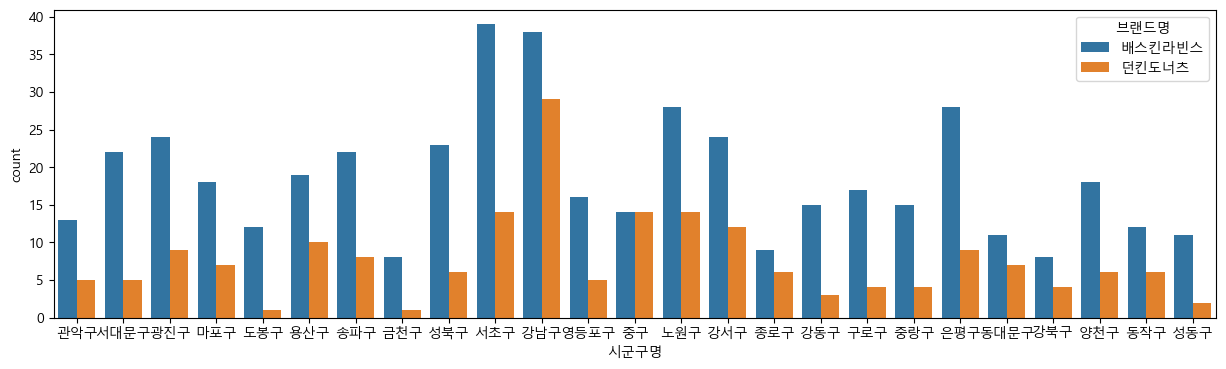

In [138]:
plt.figure(figsize=(15,4))
sns.countplot(data=df4, x='시군구명', hue='브랜드명')
plt.show()

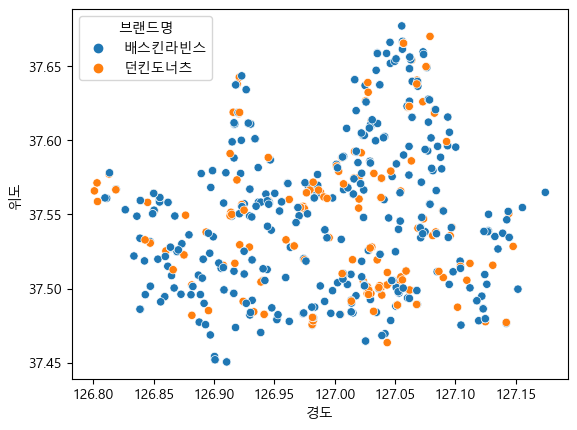

In [142]:
df4.pivot_table(index='시군구명', columns = '브랜드명', values='상호명', aggfunc='count')

sns.scatterplot(data=df4, x='경도', y ='위도', hue='브랜드명')
plt.show()

In [145]:
import folium

lat = df4['위도'].mean()
long = df4['경도'].mean()

# map 객체 생성
m = folium.Map([lat, long], zoom_start=12)

# map에 marker를 추가
df4_sample = df4.sample(30)

for i in df4_sample.index:
    sub_lat = df4_sample.loc[i, '위도']
    sub_long = df4_sample.loc[i, '경도']
    title = df4_sample.loc[i, '상호명'] + '-' + df.loc[i, '도로명주소']
    
    icon_color = 'blue'
    if df4_sample.loc[i, '브랜드명'] == '던킨도너츠':
        icon_color = 'red'

    # map에 marker를 추가
    folium.Marker([sub_lat,sub_long], icon=folium.Icon(color=icon_color), popup=f'<i>{title}</i>', tooltip=title).add_to(m)

m
m.save('index.html')
